# **Matrix Multiplication from the Foundations**

This notebook will setup all our required matrix multiplication code.

## **Colab Setup**

The setup structure for this will depend on the environment. I'm assuming a Google Colab environment in this case, which will require the following setup from the Github repo, and assumes that the repo has already been cloned into Google Drive:

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd gdrive/My Drive/git_folder/DL_From_Foundations
! git pull

Mounted at /content/gdrive
/content/gdrive/My Drive/git_folder/DL_From_Foundations
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
From https://github.com/BHouwens/DL_From_Foundations
   91f7e9c..ce3d8b6  main       -> origin/main
Updating 91f7e9c..ce3d8b6
Fast-forward
 01_matrix-mul.ipynb | 600 ++++++++++++++++++++++++++++++++++++++++++++--------
 1 file changed, 515 insertions(+), 85 deletions(-)


## **Testing Imports**

This section is to test outputs from notebook to Python script conversion. It's not necessary to run this stuff if imports are going to be ignored.

In [2]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
from exp.nb_0 import *
import operator

In [ ]:
#export
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(a,b,operator.eq,'==')

A simple test can be run using this little unit test util. Example with the `TEST` output:

In [ ]:
test_eq(TEST,'test')

And another test using `pretty_log`:

In [ ]:
pretty_log("Hello World")


#==== Hello World ====#



In [ ]:
# To run tests in console:
# !python3 run_notebook.py 01_matrix-mul.ipynb



---




## **Getting the Data**

In [4]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL='https://ndownloader.figshare.com/files/25635053'

Now we can try to download the MNIST dataset through the URL:

In [5]:
path = datasets.download_data(MNIST_URL, ext='.gz'); path

PosixPath('/root/.fastai/data/25635053.gz')

Once the data has been downloaded we can unzip and check it out in tensor form. Note that Pytorch tensors follow very much the Numpy array structure and utility.

In [6]:
from keras.datasets import mnist

# Load the data into the train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

# Map the sets to tensors
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))

# Flatten the 28 * 28 to match the course
x_train = torch.flatten(x_train, 1)
x_valid = torch.flatten(x_valid, 1)

n, c = x_train.shape

# Let's see the shapes
pretty_log("X train data")
print(x_train[0][:28])
print(n)

pretty_log("Y vector dependent")
print(y_train)
print(y_train.shape) 

pretty_log("Y min")
print(y_train.min())

pretty_log("Y max")
y_train.max()

11493376/11490434 [==============================] - 0s 0us/step

#==== X train data ====#

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], dtype=torch.uint8)
60000

#==== Y vector dependent ====#

tensor([5, 0, 4,  ..., 5, 6, 8], dtype=torch.uint8)
torch.Size([60000])

#==== Y min ====#

tensor(0, dtype=torch.uint8)

#==== Y max ====#



tensor(9, dtype=torch.uint8)

In [ ]:
# Let's unit test our expectations
assert n==y_train.shape[0]==60000
test_eq(c1,28)
test_eq(c2,28)
test_eq(y_train.min(),0)
test_eq(y_train.max(),9)

We'll set the colour map here and take a look at a sample from our training set. Colourmaps in Matplotlib are often split into several categories based on their function:

*   **Sequential**: change in lightness and often saturation of color incrementally, often using a single hue; should be used for representing information that has ordering.

*   **Diverging**: change in lightness and possibly saturation of two different colors that meet in the middle at an unsaturated color; should be used when the information being plotted has a critical middle value, such as topography or when the data deviates around zero.

*   **Cyclic**: change in lightness of two different colors that meet in the middle and beginning/end at an unsaturated color; should be used for values that wrap around at the endpoints, such as phase angle, wind direction, or time of day.

*   **Qualitative**: often are miscellaneous colors; should be used to represent information which does not have ordering or relationships.

More info on which `image.cmap` value corresponds to which function can be found in the Matplotlib docs [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). We'll set this one to `gray`:


In [ ]:
mpl.rcParams['image.cmap'] = 'gray'


Okay finally on to the training set sample:

torch.ByteTensor

#==== Image sample ====#



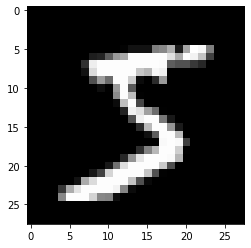

In [ ]:
img = x_train[0]

# Log type
print(img.view(28,28).type())

# Show sample
pretty_log("Image sample")
plt.imshow(img.view((28,28)));


   
    
---





## **Initial Model**

Let's start with some random initialisation values:

In [7]:
weights = torch.randn(784,10)
bias = torch.zeros(10)

### **Matrix Multiplication**
And now we can begin with our matrix multiplication

In [ ]:
def matrix_mul(a, b):
  a_rows, a_cols = a.shape
  b_rows, b_cols = b.shape

  # First check that multiplication is possible
  assert a_cols == b_rows

  # And then update a pytorch tensor from zeros
  c = torch.zeros(a_rows, b_cols)

  for i in range(a_rows):
    for j in range(b_cols):
      for k in range(a_cols): # can also be b_rows
        c[i, j] += a[i, k] * b[k, j]
  
  return c

From here we can test against the upcoming weights:

In [8]:
m1 = x_valid[:5]
m2 = weights

m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [ ]:
%time t1 = matrix_mul(m1, m2)

CPU times: user 694 ms, sys: 678 µs, total: 695 ms
Wall time: 706 ms


In [ ]:
t1.shape

torch.Size([5, 10])

The multiplication works, but it's pretty slow (running on `O(n^2.m)`). We can speed it up using element-wise operations.

### **Element-wise Ops**

Operators (+,-,*,/,>,<,==) are usually element-wise. This is helpful because Python is slow (very slow!), and in order to perform operations which are computationally intensive we need to call Pytorch methods which are lower level (FFI or Cython?). This can be accomplished by making operations happen in an element-wise fashion.

Examples of element-wise operations:

In [ ]:
a = tensor([10., 6, -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [ ]:
a + b

tensor([12., 14.,  3.])

In [ ]:
(a < b).float().mean()

tensor(0.6667)

In [10]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]])
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

#### **Frobenius Norm**

$\|A\|_\text{F} = \sqrt{\sum_{i,j=1}^n |a_{ij}|^2}$

The Frobenius norm crops up semi-regularly in deep learning literature. It's a formula which performs element-wise multiplication for each element in a  matrix (in this case $R^2$) and takes the form of the above equation.

Although it looks scary, the formula can be implemented trivially in code as the following:

In [11]:
a_f = (m*m).sum().sqrt()

We can use this to reduce the number of computationally intensive loops that need to be performed in our multiplication. Now we can multiply the full axes together (row * col) to get a $R^1$ tensor we can sum:

In [50]:
def matrix_mul(a, b):
  a_rows, a_cols = a.shape
  b_rows, b_cols = b.shape

  assert a_cols == b_rows
  c = torch.zeros(a_rows, b_cols)

  for i in range(a_rows):
    for j in range(b_cols):
      c[i,j] = (a[i,:] * b[:,j]).sum()
  
  return c

Notice the change of `k` value to the full axis in the multiplication step.

In [51]:
%timeit -n 10 _=matrix_mul(m1, m2)

10 loops, best of 5: 1.08 ms per loop


And check the speed! A huge boost in performance

#### **Broadcasting**

The term **broadcasting** describes how arrays with different shapes are treated during arithmetic operations. The term broadcasting was first used by Numpy.

From the [Numpy documentation](https://docs.scipy.org/doc/numpy-1.10.0/user/basics.broadcasting.html):

> The term broadcasting describes how numpy treats arrays with 
different shapes during arithmetic operations. Subject to certain 
constraints, the smaller array is “broadcast” across the larger 
array so that they have compatible shapes. Broadcasting provides a 
means of vectorizing array operations so that looping occurs in C
instead of Python. It does this without making needless copies of 
data and usually leads to efficient algorithm implementations.

Broadcasting arithmetic operations with a $m$-dimensional array can be performed with a scalar, for example:


In [13]:
from numpy import array

a = array([1, 2, 3])
pretty_log("m-dimensional array")
print(a)

b = 2
pretty_log("scalar")
print(b)

# This will work via broadcasting
c = a + b
pretty_log("broadcasting result")
print(c)


#==== m-dimensional array ====#

[1 2 3]

#==== scalar ====#

2

#==== broadcasting result ====#

[3 4 5]


The reason it works is that when performing the operation, the scalar `b` is multiplied in the first dimension so it has the same number of entries as `a`:

In [ ]:
# Given vector a
a = [a1, a2, a3]

# Given scalar b
b

# Scalar b becomes vector b in broadcasting, through duplication
b = [b1, b2, b3]

# The 2 vectors can then be operated on directly
c = a + b
c = [a1 + b1, a2 + b2, a3 + b3]

#### **Broadcast Limitations**

Arithmetic, including broadcasting, can only be performed when:

*   the shape of each dimension in the arrays are equal, or
*   one of them has the dimension size of 1

The dimensions are considered in reverse order, starting with the trailing dimension; for example, looking at columns before rows in a two-dimensional case.

Therefore, the comparison between a 2-dimensional array `A` with 2 rows and 3 columns and a vector `b` with 3 elements:

In [19]:
A = array([[0, 0, 0],
           [0, 0, 0]])

b = array([0, 0, 0])

print(A.shape)
print(b.shape)

(2, 3)
(3,)


is considered as (note the last shape entry, the column, considered):

In [ ]:
# A.shape = (2 x 3)
# b.shape = (1 x 3)

This is also okay with a scalar, since it's a 1-dimensional array:

In [ ]:
# A.shape = (2 x 3)
# b.shape = (1) or (1, 1)

But the following will throw an error, due to mismatched columns:

In [21]:
# A.shape = (2 x 3)
A = array([[0, 0, 0],
           [0, 0, 0]])

# b.shape = (1 x 2)
b = array([0, 0])

try:
  C = A + b
except ValueError:
  pretty_log("These arrays cannot be broadcast due to their shape", "error")
  print(A.shape)
  print(b.shape)


#==== These arrays cannot be broadcast due to their shape ====#

(2, 3)
(2,)


#### **A Note on Dimensional Manipulation**

We can manipulate the dimensions of a Numpy array be using `squeeze` and `unsqueeze`, which will reduce or add dimensions respectively.

In [34]:
c = tensor([10.,20,30])

print(c)
print(c.shape)

tensor([10., 20., 30.])
torch.Size([3])


In [35]:
d = c.unsqueeze(0)

print(d)
print(d.shape)

tensor([[10., 20., 30.]])
torch.Size([1, 3])


In [36]:
e = c.unsqueeze(1)

print(e)
print(e.shape)

tensor([[10.],
        [20.],
        [30.]])
torch.Size([3, 1])


Using the methods directly is a bit unwieldy, so Pytorch includes a shorthand to perform them inline:

In [37]:
c.shape, c.unsqueeze(0).shape,c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

This is done using the `None` keyword in Python:

In [38]:
c.shape, c[None].shape,c[:,None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

#### **Matrix_mul with broadcasting**


In [52]:
def matrix_mul(a,b):
    ar,ac = a.shape
    br,bc = b.shape

    assert ac==br
    c = torch.zeros(ar, bc)

    for i in range(ar):
       #c[i,j] = (a[i,:] * b[:,j]).sum() # previous
        c[i,:] = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    
    return c

In [53]:
%timeit -n 10 _=matrix_mul(m1, m2)

10 loops, best of 5: 219 µs per loop


### **Einsten Summation**

Einstein summation (`einsum`) is a compact representation/notation for combining products and sums in a general way. From the [Numpy docs](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html):

> The subscripts string is a comma-separated list of subscript labels, where each label refers to a dimension of the corresponding operand. Whenever a label is repeated it is summed, so np.einsum('i,i', a, b) is equivalent to np.inner(a,b). If a label appears only once, it is not summed, so np.einsum('i', a) produces a view of a with no changes.



In [57]:
# c[i,j] += a[i,k] * b[k,j]
# c[i,j] = (a[i,:] * b[:,j]).sum()
def matrix_mul(a,b): return torch.einsum('ik,kj->ij', a, b)

In [63]:
# Convert to Byte tensor
m2 = m2.byte()
m2.type()

'torch.ByteTensor'

In [64]:
%timeit -n 10 _=matrix_mul(m1, m2)

10 loops, best of 5: 63.2 µs per loop


### **Pytorch op**

Finally, we can use Pytorch's function or operator directly for matrix multiplication:

In [65]:
%timeit -n 10 t2 = m1.matmul(m2)

10 loops, best of 5: 48.3 µs per loop


In [66]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

It's also possible to use the shorthand for this operator:

In [68]:
%timeit -n 10 t2 = m1@m2

10 loops, best of 5: 47.3 µs per loop




---



## **Exports**


In [ ]:
!python notebook2script.py 01_matrix-mul.ipynb